In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
import time
import datetime as dt
import numpy as np
from sklearn import  svm

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

### PCA dimenshion reduction on MNIST 

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [4]:
# These are the images
mnist.data.shape

(70000, 784)

In [5]:
# These are the labels
mnist.target.shape

(70000,)

In [6]:
scaler = StandardScaler()

# Fit on training set only.
mnist.data = scaler.fit_transform(mnist.data)

In [7]:
pca = PCA().fit(mnist.data)

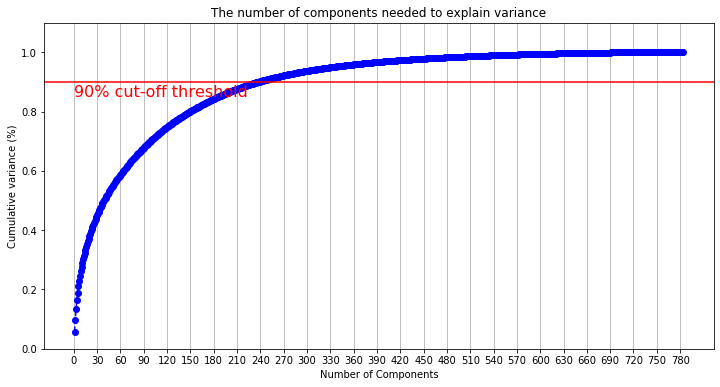

In [8]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 785, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 785, step=30)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [9]:
pca = PCA(.90)

In [10]:
lower_dimensional_data = pca.fit_transform(mnist.data)

In [11]:
pca.n_components_

238

In [12]:
approximation = pca.inverse_transform(lower_dimensional_data)

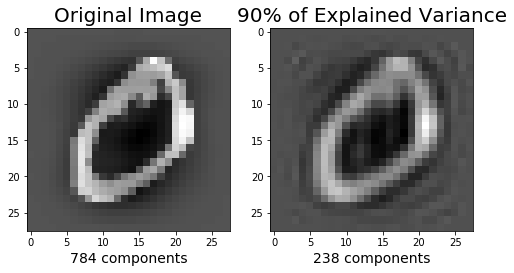

In [13]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[1].reshape(28,28),
              cmap = 'gray');#gray_r invert the color
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 332 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = 'gray');
plt.xlabel('238 components', fontsize = 14)
plt.title('90% of Explained Variance', fontsize = 20);

In [14]:
mnist.target[1]

'0'

### Train Model Without Dimenshion Reduction

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.35, random_state=0)

### Logistic Regression

In [16]:
Lr = LogisticRegression(solver = 'lbfgs',verbose=1,n_jobs=-1)  #default lbfgs 

In [17]:
start_time= dt.datetime.now()
Lr.fit(X_train, y_train)
end_time= dt.datetime.now()
print('total time:',end_time-start_time)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


total time: 0:00:47.858283


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   47.8s finished


In [18]:
# Returns a NumPy Array
# Predict for One Observation (image)
Lr.predict(X_test[0].reshape(1,-1))

array(['0'], dtype=object)

In [19]:
Lr.predict(X_test[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '3'], dtype=object)

In [20]:
Lr.predict_proba(X_test[0].reshape(1,-1))

array([[5.30186676e-01, 4.27587431e-13, 5.63091948e-07, 3.16572351e-10,
        9.77051749e-08, 2.99504573e-04, 4.68355635e-01, 3.14417635e-12,
        1.15748589e-03, 3.77487023e-08]])

In [21]:
Lr.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [22]:
predictions = Lr.predict(X_test)

In [23]:
# Use score method to get accuracy of model
score = Lr.score(X_test, y_test)
print(score)

0.9090612244897959


#### Examine wrongly classifed case

In [44]:
for i in range(20):
    if(Lr.predict(X_test[i].reshape(1,-1)) != y_test[i]):
        print('index',i,'true value',y_test[i],'predicted value',Lr.predict(X_test[i].reshape(1,-1))) 

index 5 true value 9 predicted value ['7']
index 18 true value 3 predicted value ['9']


In [49]:
xtest5=pca.inverse_transform(X_test[5])

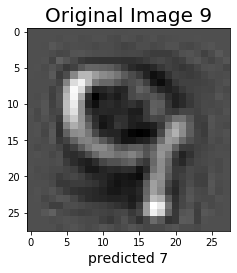

In [51]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(xtest5.reshape(28,28),
              cmap = 'gray');#gray_r invert the color
plt.xlabel('predicted 7', fontsize = 14)
plt.title('Original Image 9', fontsize = 20);

In [24]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[2328    1   13    2    5   36   28    6   16    5]
 [   0 2719   15    6    4   13    4    6   25    4]
 [  22   30 2166   37   39   11   39   36   70    6]
 [  12   13   59 2189    4   89    4   28   62   27]
 [   7    7   16    9 2136    6   30   22   12   71]
 [  22   14   24   74   29 1896   40   10   77   18]
 [  18    5   34    5   35   33 2240    3   12    0]
 [   3   15   26   10   29    5    1 2339   15  114]
 [  13   57   41   58   10   80   25    7 2063   34]
 [  11   14   13   29   81   20    1   85   21 2196]]


(10.0, 0.0)

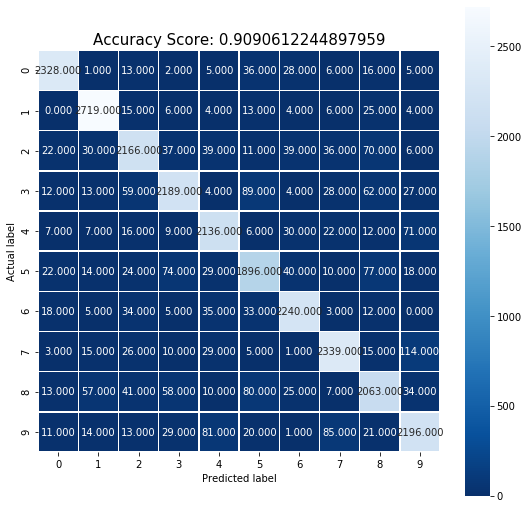

In [25]:
plt.figure(figsize=(9,9))
ax=sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Train Model with Dimenshion reduction

In [26]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [27]:
start_time= dt.datetime.now()
Lr.fit(X_train, y_train)
end_time= dt.datetime.now()
print('total time:',(end_time-start_time).seconds)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


total time: 9


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.1s finished


In [28]:
predictions = Lr.predict(X_test)

In [29]:
score = Lr.score(X_test, y_test)
print(score)

0.9188163265306123


In [30]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[2354    0   10    2    4   21   24    4   19    2]
 [   0 2727   16    7    4    7    0    4   27    4]
 [  21   29 2191   35   33   12   25   40   61    9]
 [   6   11   65 2205    2   88    5   19   65   21]
 [   5   11   16    3 2175    2   28   15   14   47]
 [  19   12   22   71   27 1911   40    8   73   21]
 [  16    8   26    1   21   32 2266    1   14    0]
 [   4   10   31    9   25    7    0 2373    6   92]
 [   9   59   31   49   12   79   19    3 2094   33]
 [  10   11    9   30   84   17    2   75   18 2215]]


## R

### Conclusion
time take to train without PCA is about 1 min after PCA dimenshion reduction of 0.90 time takes around 12 seconds